<a href="https://colab.research.google.com/github/Ads369/Ads_2s/blob/main/9_4_%D0%94%D0%BE%D0%BC%D0%B0%D1%88%D0%BD%D1%8F%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Устанавливаем Seaborn для построения графиков
!pip install -q seaborn

In [3]:
import os
import tempfile

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import tensorflow_datasets as tfds

---

# Задание 1

---

In [1]:
# Загрузка набора данных
!wget https://storage.yandexcloud.net/academy.ai/practica/fake_news.csv

--2024-07-16 20:49:09--  https://storage.yandexcloud.net/academy.ai/practica/fake_news.csv
Resolving storage.yandexcloud.net (storage.yandexcloud.net)... 213.180.193.243, 2a02:6b8::1d9
Connecting to storage.yandexcloud.net (storage.yandexcloud.net)|213.180.193.243|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 30696129 (29M) [text/csv]
Saving to: ‘fake_news.csv’

fake_news.csv       100%[===================>]  29,27M  8,59MB/s    in 3,4s    

2024-07-16 20:49:13 (8,59 MB/s) - ‘fake_news.csv’ saved [30696129/30696129]



In [ ]:
!pip install scikit-learn

In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split

In [16]:
data = pd.read_csv("./fake_news.csv")
data = data.dropna()
data["text"] = data["title"] + "\n" + data["text"]

In [6]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   title       6335 non-null   object
 2   text        6335 non-null   object
 3   label       6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB
None


In [9]:
x = data.drop(["label"], axis=1)
y = data["label"]

In [17]:
# Разделим данные на обучающие и тестовые множества
x_train, x_test, y_train, y_test = train_test_split(
    data["text"], data["label"], test_size=0.2, random_state=7
)

In [28]:
# Преобразуем текстовые данные в числовые признаки с помощью TfidfVectorizer
vectorizer = TfidfVectorizer()
tfidf_train = vectorizer.fit_transform(x_train)
tfidf_test = vectorizer.transform(x_test)

In [29]:
# Обучим модель с использованием PassiveAggressiveClassifier
pac = PassiveAggressiveClassifier(max_iter=50)
pac.fit(tfidf_train, y_train)

PassiveAggressiveClassifier(max_iter=50)

In [31]:
# Сделаем предсказания и оценим точность модели
y_pred = pac.predict(tfidf_test)
score = accuracy_score(y_test, y_pred)
print(f"Accuracy: {round(score*100, 2)}%")

Accuracy: 92.82%


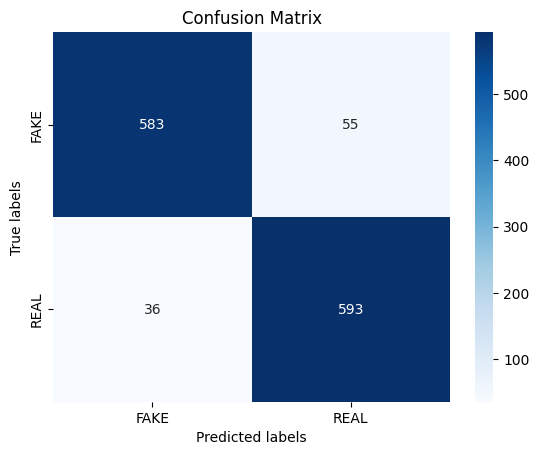

In [32]:
# Построим и визуализируем матрицу ошибок
conf_mat = confusion_matrix(y_test, y_pred, labels=["FAKE", "REAL"])
sns.heatmap(
    conf_mat,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["FAKE", "REAL"],
    yticklabels=["FAKE", "REAL"],
)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")
plt.show()

---

# Задание 2

---

In [33]:
# Загрузка набора данных
!wget https://storage.yandexcloud.net/academy.ai/practica/parkinsons.data

--2024-07-18 19:57:15--  https://storage.yandexcloud.net/academy.ai/practica/parkinsons.data
Resolving storage.yandexcloud.net (storage.yandexcloud.net)... 2a02:6b8::1d9, 213.180.193.243
Connecting to storage.yandexcloud.net (storage.yandexcloud.net)|2a02:6b8::1d9|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 40697 (40K) [application/x-www-form-urlencoded]
Saving to: ‘parkinsons.data.1’

parkinsons.data.1   100%[===================>]  39,74K  --.-KB/s    in 0,002s  

2024-07-18 19:57:15 (20,5 MB/s) - ‘parkinsons.data.1’ saved [40697/40697]



In [17]:
!pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 3.5 MB/s eta 0:00:003.6 MB/s eta 0:00:010m

[notice] A new release of pip is available: 24.1.1 -> 24.1.2
[notice] To update, run: pip install --upgrade pip


In [37]:
data = pd.read_csv("./parkinsons.data")
data = data.dropna()
# print(data.head())
print(data.info())
# print(data.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [50]:
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

In [39]:
# Разделение данных на признаки и целевую переменную
x = data.drop(["name", "status"], axis=1)
y = data["status"]

In [66]:
# Разделение на обучающую и тестовую выборки
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=7)

In [67]:
# Стандартизация данных
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [68]:
# Создание и обучение модели XGBoost
model = XGBClassifier()
model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [69]:
# Предсказания на тестовой выборке
y_pred = model.predict(x_test)

In [70]:
# Оценка точности модели
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {round(accuracy * 100, 2)}%")

Accuracy: 94.87%


---

# Задание 3

---

In [4]:
import os
import tempfile

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import tensorflow_datasets as tfds
from matplotlib import pyplot as plt

# Загрузка набора данных groove
_train_dataset, _val_dataset, _test_dataset = tfds.load(
    "groove/full-16000hz", split=["train", "validation", "test"]
)

Dl Completed...:   0%|          | 0/29 [00:00<?, ? file/s]

Dataset groove downloaded and prepared to /root/tensorflow_datasets/groove/full-16000hz/2.0.1. Subsequent calls will reuse this data.


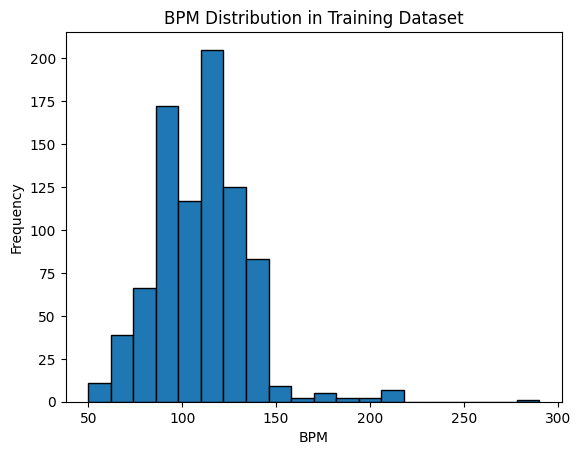

In [5]:
def extract_bpm(dataset):
    bpm_values = []
    for data in dataset:
        bpm = data["bpm"].numpy()
        bpm_values.append(bpm)
    return bpm_values


bpm_train = extract_bpm(_train_dataset)

plt.hist(bpm_train, bins=20, edgecolor="black")
plt.title("BPM Distribution in Training Dataset")
plt.xlabel("BPM")
plt.ylabel("Frequency")
plt.show()

In [53]:
from collections import Counter

cnt_bpm_dict = Counter(bpm_train)
print(cnt_bpm_dict)

Counter({120: 68, 95: 64, 100: 58, 140: 42, 125: 38, 92: 35, 93: 34, 105: 32, 110: 31, 112: 31, 116: 31, 128: 26, 130: 25, 122: 25, 144: 21, 78: 19, 70: 18, 114: 16, 84: 15, 75: 15, 115: 14, 118: 13, 67: 13, 90: 12, 83: 10, 60: 10, 96: 9, 148: 8, 98: 8, 135: 7, 215: 7, 94: 6, 145: 6, 63: 6, 104: 6, 102: 5, 86: 5, 80: 5, 108: 4, 124: 4, 142: 4, 88: 4, 101: 3, 132: 3, 127: 2, 180: 2, 89: 2, 134: 2, 170: 2, 200: 2, 126: 2, 82: 2, 185: 1, 64: 1, 50: 1, 99: 1, 87: 1, 176: 1, 152: 1, 72: 1, 136: 1, 162: 1, 290: 1, 117: 1, 182: 1, 158: 1})


In [6]:
def preprocess(data):
    # Преобразование аудио в спектрограмму
    audio = data["audio"]
    spectrogram = tf.signal.stft(audio, frame_length=256, frame_step=128)
    spectrogram = tf.abs(spectrogram)

    # Добавление одного измерения
    spectrogram = tf.expand_dims(spectrogram, axis=-1)

    # Приведение спектрограмм к фиксированному размеру
    spectrogram = tf.image.resize(spectrogram, [128, 129])

    return spectrogram, data["bpm"]

In [7]:
train_dataset = (
    _train_dataset.map(preprocess).batch(32).prefetch(tf.data.experimental.AUTOTUNE)
)
val_dataset = (
    _val_dataset.map(preprocess).batch(32).prefetch(tf.data.experimental.AUTOTUNE)
)
test_dataset = (
    _test_dataset.map(preprocess).batch(32).prefetch(tf.data.experimental.AUTOTUNE)
)

In [28]:
model = tf.keras.Sequential(
    [
        tf.keras.layers.Input(shape=(128, 129, 1)),
        tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation="relu"),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation="relu"),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation="relu"),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        tf.keras.layers.GlobalAveragePooling2D(),
        tf.keras.layers.Dense(128, activation="relu"),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(64, activation="relu"),
        tf.keras.layers.Dense(1),
    ]
)

In [29]:
model.compile(optimizer="adam", loss="mse", metrics=["mae"])

In [48]:
history = model.fit(train_dataset, validation_data=val_dataset, epochs=100)

Epoch 1/100
27/27 [==============================] - 11s 407ms/step - loss: 147.5756 - mae: 9.6041 - val_loss: 981.4283 - val_mae: 26.5483
Epoch 2/100
27/27 [==============================] - 9s 317ms/step - loss: 133.6661 - mae: 9.1482 - val_loss: 538.6220 - val_mae: 18.5500
Epoch 3/100
27/27 [==============================] - 8s 248ms/step - loss: 145.4099 - mae: 9.4627 - val_loss: 525.9537 - val_mae: 17.7904
Epoch 4/100
27/27 [==============================] - 10s 356ms/step - loss: 137.0762 - mae: 9.0688 - val_loss: 490.5637 - val_mae: 16.6462
Epoch 5/100
27/27 [==============================] - 10s 339ms/step - loss: 143.6280 - mae: 9.5209 - val_loss: 620.5291 - val_mae: 20.4007
Epoch 6/100
27/27 [==============================] - 8s 258ms/step - loss: 149.5823 - mae: 9.5438 - val_loss: 533.4031 - val_mae: 17.9069
Epoch 7/100
27/27 [==============================] - 8s 295ms/step - loss: 144.5173 - mae: 9.4197 - val_loss: 704.7560 - val_mae: 22.0690
Epoch 8/100
27/27 [============

In [66]:
print(history.history["loss"][-1])

54.00930404663086


In [ ]:
while history.history["loss"][-1] > 1:
    history = model.fit(train_dataset, validation_data=val_dataset, epochs=10)

Epoch 1/10
27/27 [==============================] - 8s 277ms/step - loss: 59.2530 - mae: 5.9034 - val_loss: 1009.6219 - val_mae: 23.7990
Epoch 2/10
27/27 [==============================] - 7s 254ms/step - loss: 67.8278 - mae: 6.3018 - val_loss: 753.9171 - val_mae: 20.8668
Epoch 3/10
27/27 [==============================] - 8s 259ms/step - loss: 68.8957 - mae: 6.1205 - val_loss: 904.2274 - val_mae: 22.5364
Epoch 4/10
27/27 [==============================] - 9s 298ms/step - loss: 63.3458 - mae: 5.8131 - val_loss: 1691.9117 - val_mae: 35.5519
Epoch 5/10
27/27 [==============================] - 7s 234ms/step - loss: 66.9640 - mae: 6.2578 - val_loss: 2298.9243 - val_mae: 43.2816
Epoch 6/10
27/27 [==============================] - 9s 312ms/step - loss: 63.1231 - mae: 6.2522 - val_loss: 2450.9094 - val_mae: 45.0039
Epoch 7/10
27/27 [==============================] - 9s 319ms/step - loss: 70.9188 - mae: 6.4995 - val_loss: 1729.7574 - val_mae: 36.7441
Epoch 8/10
27/27 [=========================

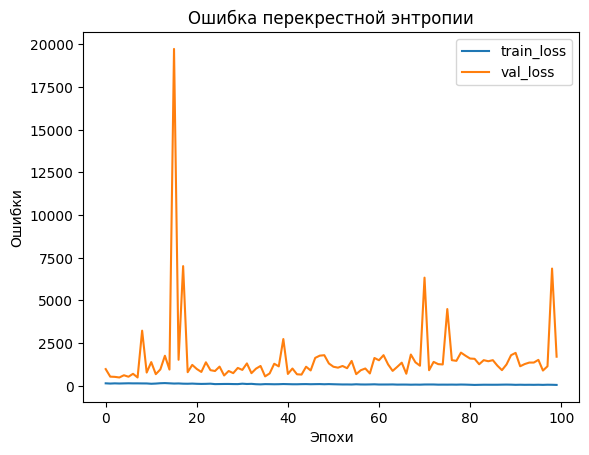

In [64]:
plt.plot(history.history["loss"], label="train_loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.title("Ошибка перекрестной энтропии")
plt.xlabel("Эпохи")
plt.ylabel("Ошибки")
plt.legend()
plt.show()

In [22]:
def get_bpm_predictions(dataset):
    y_true = []
    y_pred = []
    for spectrogram, bpm in dataset:
        preds = model.predict(spectrogram)
        y_true.extend(bpm.numpy())
        y_pred.extend(np.round(preds))  # Округление предсказанных значений
    return y_true, y_pred

In [40]:
y_true, y_pred = get_bpm_predictions(test_dataset)

1/1 [==============================] - 0s 27ms/step


In [63]:
def accuracy_per_bpm(y_true, y_pred):
    y_pred_rounded = np.round(y_pred)
    bpm_values = np.unique(y_true)
    accuracy_dict = {}

    for bpm in bpm_values:
        idx = np.where(y_true == bpm)
        true_bpm = np.array(y_true)[idx]
        pred_bpm = np.array(y_pred_rounded)[idx]
        accuracy = np.mean(abs(true_bpm - pred_bpm) < 5)
        # accuracy_dict[bpm] = accuracy
        count = len(true_bpm)
        accuracy_dict[bpm] = {"accuracy": accuracy, "count": count}

    return accuracy_dict


accuracy_dict = accuracy_per_bpm(y_true, y_pred)

for bpm, accuracy in accuracy_dict.items():
    print(
        f'BPM: {bpm}, Accuracy: {accuracy["accuracy"]:.2f}, Cnt: {accuracy["count"]}',
    )

BPM: 60, Accuracy: 0.00, Cnt: 1
BPM: 63, Accuracy: 0.00, Cnt: 2
BPM: 65, Accuracy: 0.00, Cnt: 4
BPM: 67, Accuracy: 0.00, Cnt: 1
BPM: 75, Accuracy: 0.00, Cnt: 2
BPM: 78, Accuracy: 0.00, Cnt: 3
BPM: 80, Accuracy: 0.00, Cnt: 4
BPM: 83, Accuracy: 1.00, Cnt: 1
BPM: 84, Accuracy: 0.33, Cnt: 6
BPM: 86, Accuracy: 0.00, Cnt: 4
BPM: 87, Accuracy: 0.75, Cnt: 4
BPM: 90, Accuracy: 0.00, Cnt: 1
BPM: 92, Accuracy: 0.00, Cnt: 3
BPM: 93, Accuracy: 0.00, Cnt: 6
BPM: 95, Accuracy: 0.60, Cnt: 5
BPM: 96, Accuracy: 0.17, Cnt: 6
BPM: 100, Accuracy: 0.43, Cnt: 7
BPM: 102, Accuracy: 0.00, Cnt: 4
BPM: 105, Accuracy: 0.18, Cnt: 11
BPM: 108, Accuracy: 1.00, Cnt: 1
BPM: 110, Accuracy: 0.00, Cnt: 1
BPM: 112, Accuracy: 0.50, Cnt: 2
BPM: 114, Accuracy: 0.00, Cnt: 4
BPM: 116, Accuracy: 0.40, Cnt: 5
BPM: 118, Accuracy: 0.00, Cnt: 1
BPM: 120, Accuracy: 0.14, Cnt: 7
BPM: 122, Accuracy: 0.33, Cnt: 3
BPM: 125, Accuracy: 0.00, Cnt: 3
BPM: 128, Accuracy: 0.00, Cnt: 4
BPM: 130, Accuracy: 0.67, Cnt: 3
BPM: 135, Accuracy: 0.00,